## Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.


In [25]:
#Import Libraries
# Import necessary libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

In [26]:
#Load Data
# Load the dataset from an Excel file into a pandas DataFrame
sales_data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
sales_data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [27]:
#Data Overview
# Display the first few rows and shape of the dataset
sales_data.head()
sales_data.shape

(42, 2)

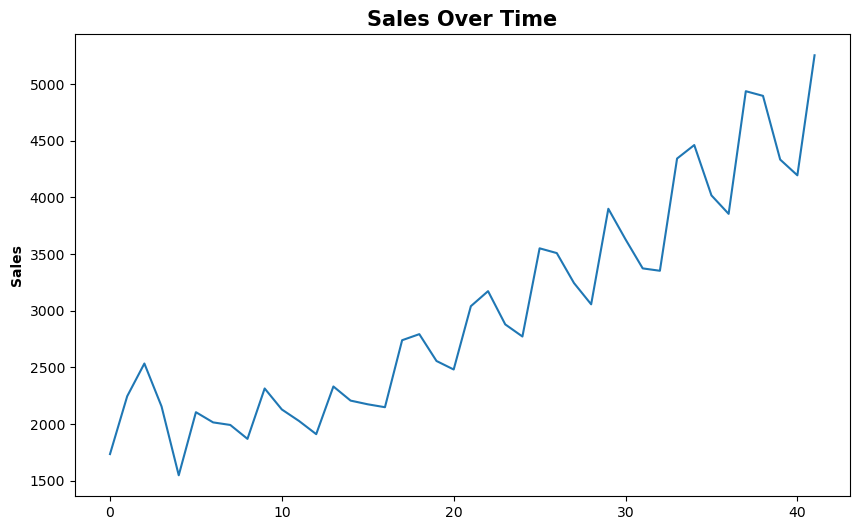

In [28]:
#Visualize Sales Data
# Plot the sales data to visualize trends over time
plt.figure(figsize=(10, 6))
plt.title("Sales Over Time", fontsize=15, fontweight='bold')
plt.ylabel("Sales", fontsize=10, fontweight='bold')
plt.plot(sales_data['Sales'])
plt.show()

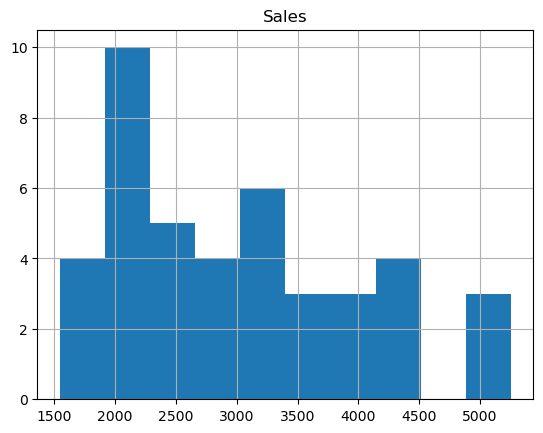

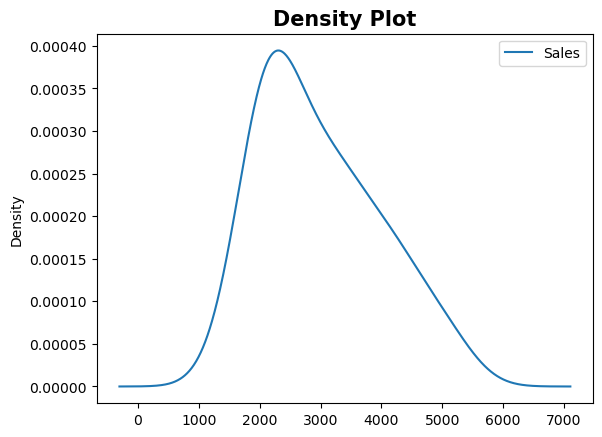

In [29]:
#Histogram and Density Plot
# Create histogram and density plot to understand data distribution
sales_data.hist()
sales_data.plot(kind='kde')
plt.title("Density Plot", fontsize=15, fontweight='bold')
plt.show()

In [30]:
#Extract Quarter Information
# Extract quarter information from the 'Quarter' column
sales_data['quarter'] = sales_data['Quarter'].apply(lambda x: x[:2])

In [31]:
#Create Dummy Variables
# Create dummy variables for each quarter
quarter_dummies = pd.get_dummies(sales_data['quarter'])
sales_data = pd.concat([sales_data, quarter_dummies], axis=1)

In [32]:
#Add Time Index and Log Transformation
# Add time index and squared time index for trend analysis
sales_data["time_index"] = np.arange(1, len(sales_data) + 1)
sales_data["time_index_squared"] = sales_data["time_index"] ** 2
sales_data["log_sales"] = np.log(sales_data["Sales"])

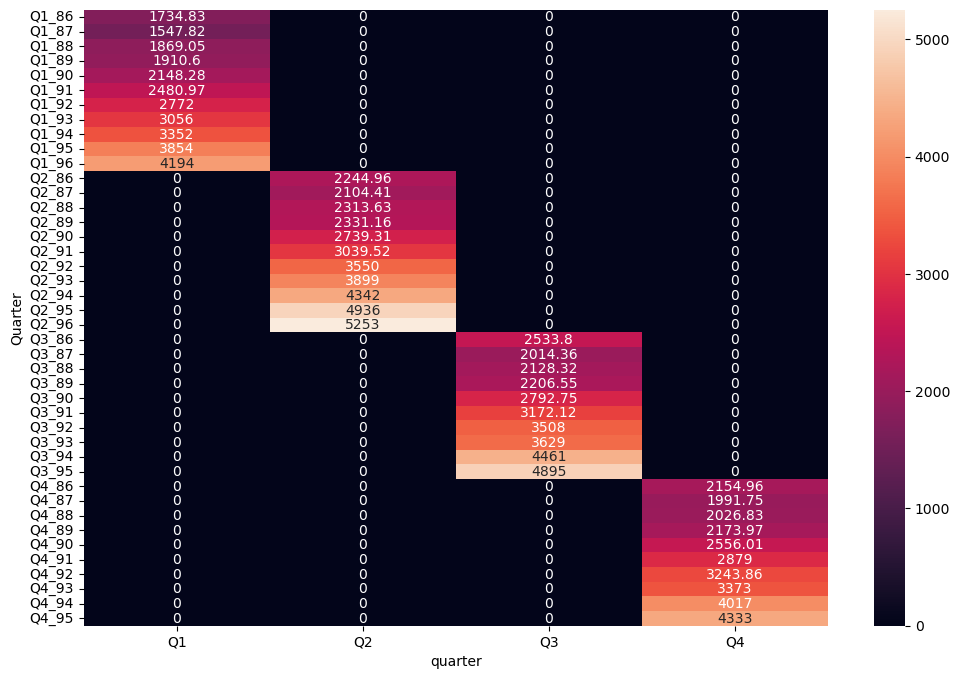

In [33]:
#Heatmap of Sales by Quarter
# Create a heatmap to visualize sales by quarter
plt.figure(figsize=(12, 8))
heatmap_data = pd.pivot_table(data=sales_data, values="Sales", index="Quarter", columns="quarter", aggfunc="mean", fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt="g")
plt.show()

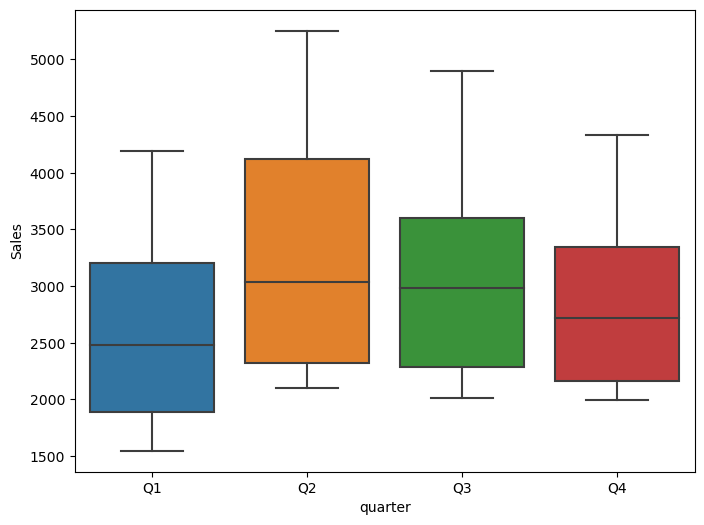

In [34]:
#Boxplot of Sales by Quarter
# Boxplot to visualize sales distribution across quarters
plt.figure(figsize=(8, 6))
sns.boxplot(x="quarter", y="Sales", data=sales_data)
plt.show()

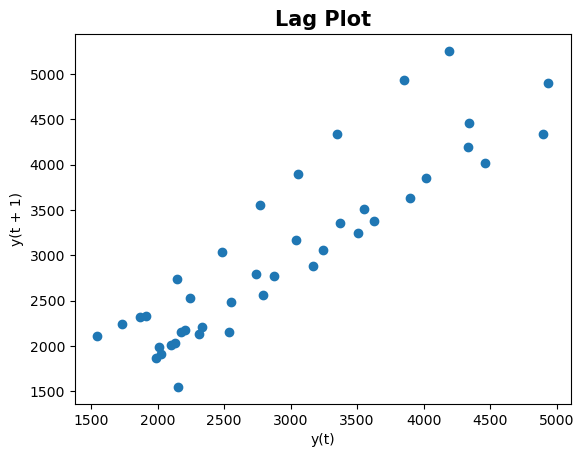

In [35]:
#Lag Plot
# Lag plot to identify any autocorrelation in the sales data
lag_plot(sales_data['Sales'])
plt.title("Lag Plot", fontsize=15, fontweight="bold")
plt.show()

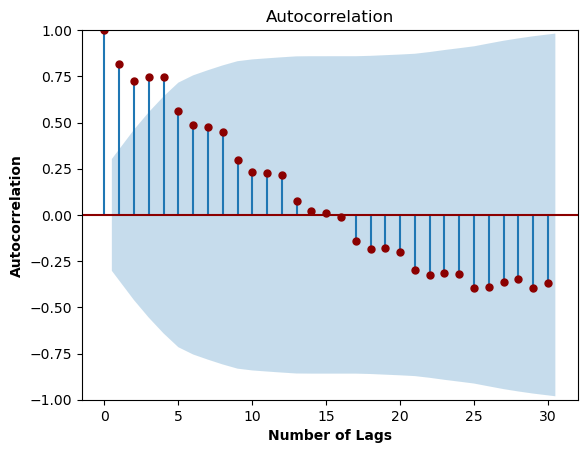

In [36]:
#Autocorrelation Function (ACF) Plot
# ACF plot to visualize autocorrelation in the sales data
plot_acf(sales_data['Sales'], lags=30, color='darkred')
plt.xlabel("Number of Lags", fontsize=10, fontweight='bold')
plt.ylabel("Autocorrelation", fontsize=10, fontweight='bold')
plt.show()

In [37]:
#Split Data into Train and Test
# Split the data into training and testing sets
train_data = sales_data.head(37)
test_data = sales_data.tail(4)

In [38]:
#Linear Model
# Fit a linear model and calculate RMSE
linear_model = smf.ols('Sales ~ time_index', data=train_data).fit()
linear_predictions = linear_model.predict(test_data['time_index'])
rmse_linear = np.sqrt(np.mean((test_data['Sales'] - linear_predictions) ** 2))
rmse_linear

671.6427504390427

In [39]:
#Exponential Model
# Fit an exponential model and calculate RMSE
exp_model = smf.ols('log_sales ~ time_index', data=train_data).fit()
exp_predictions = np.exp(exp_model.predict(test_data['time_index']))
rmse_exp = np.sqrt(np.mean((test_data['Sales'] - exp_predictions) ** 2))
rmse_exp

513.4107967981129

In [40]:
#Quadratic Model
# Fit a quadratic model and calculate RMSE
quad_model = smf.ols('Sales ~ time_index + time_index_squared', data=train_data).fit()
quad_predictions = quad_model.predict(test_data[['time_index', 'time_index_squared']])
rmse_quad = np.sqrt(np.mean((test_data['Sales'] - quad_predictions) ** 2))
rmse_quad

424.2400896279256

In [41]:
#Additive Seasonality Model
# Fit an additive seasonality model and calculate RMSE
add_seasonality_model = smf.ols('Sales ~ Q1 + Q2 + Q3 + Q4', data=train_data).fit()
add_seasonality_predictions = add_seasonality_model.predict(test_data[['Q1', 'Q2', 'Q3', 'Q4']])
rmse_add_seasonality = np.sqrt(np.mean((test_data['Sales'] - add_seasonality_predictions) ** 2))
rmse_add_seasonality

1917.8628612596383

In [42]:
#Additive Seasonality with Quadratic Trend
# Fit an additive seasonality model with quadratic trend and calculate RMSE
add_seasonality_quad_model = smf.ols('Sales ~ time_index + time_index_squared + Q1 + Q2 + Q3 + Q4', data=train_data).fit()
add_seasonality_quad_predictions = add_seasonality_quad_model.predict(test_data[['time_index', 'time_index_squared', 'Q1', 'Q2', 'Q3', 'Q4']])
rmse_add_seasonality_quad = np.sqrt(np.mean((test_data['Sales'] - add_seasonality_quad_predictions) ** 2))
rmse_add_seasonality_quad

265.82796918595636

In [43]:
#Multiplicative Seasonality Model
# Fit a multiplicative seasonality model and calculate RMSE
mult_seasonality_model = smf.ols('log_sales ~ Q1 + Q2 + Q3 + Q4', data=train_data).fit()
mult_seasonality_predictions = np.exp(mult_seasonality_model.predict(test_data))
rmse_mult_seasonality = np.sqrt(np.mean((test_data['Sales'] - mult_seasonality_predictions) ** 2))
rmse_mult_seasonality

2010.1194325040892

In [44]:
#Multiplicative Additive Seasonality Model
# Fit a multiplicative additive seasonality model and calculate RMSE
mult_add_seasonality_model = smf.ols('log_sales ~ time_index + Q1 + Q2 + Q3 + Q4', data=train_data).fit()
mult_add_seasonality_predictions = np.exp(mult_add_seasonality_model.predict(test_data))
rmse_mult_add_seasonality = np.sqrt(np.mean((test_data['Sales'] - mult_add_seasonality_predictions) ** 2))
rmse_mult_add_seasonality

262.49584669467816

In [45]:
#Compare Model RMSEs
# Compare RMSE values of different models to determine the best model
rmse_results = {
  "Model": ["Linear", "Exponential", "Quadratic", "Additive Seasonality", "Additive Seasonality with Quadratic", "Multiplicative Seasonality", "Multiplicative Additive Seasonality"],
  "RMSE": [rmse_linear, rmse_exp, rmse_quad, rmse_add_seasonality, rmse_add_seasonality_quad, rmse_mult_seasonality, rmse_mult_add_seasonality]
}
rmse_df = pd.DataFrame(rmse_results)
rmse_df.sort_values(by="RMSE")

,Model,RMSE
6,Multiplicative Additive Seasonality,262.495847
4,Additive Seasonality with Quadratic,265.827969
2,Quadratic,424.240090
1,Exponential,513.410797
0,Linear,671.642750
3,Additive Seasonality,1917.862861
5,Multiplicative Seasonality,2010.119433


In [46]:
#Final Model Prediction
# Use the best model to predict sales on the entire dataset
final_model = smf.ols('log_sales ~ time_index + Q1 + Q2 + Q3 + Q4', data=sales_data).fit()
final_predictions = np.exp(final_model.predict(sales_data))
final_predictions

0     1539.516800
1     1958.133190
2     1941.716476
3     1792.297460
4     1695.770302
5     2156.874230
6     2138.791299
7     1974.206976
8     1867.882779
9     2375.786523
10    2355.868262
11    2174.579427
12    2057.463839
13    2616.917354
14    2594.977486
15    2395.288712
16    2266.286458
17    2882.521797
18    2858.355139
19    2638.398921
20    2496.303563
21    3175.083806
22    3148.464349
23    2906.183639
24    2749.666290
25    3497.339441
26    3468.018239
27    3201.147210
28    3028.744108
29    3852.302464
30    3820.005302
31    3526.048155
32    3336.146973
33    4243.292516
34    4207.717347
35    3883.924973
36    3674.749740
37    4673.966165
38    4634.780289
39    4278.124557
40    4047.719050
41    5148.351104
dtype: float64